In [1030]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [986]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Futura"],
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

In [988]:
raw_data_file_path = '../data/raw/'
raw_data_file_name = 'aved_raw.csv'

processed_data_file_path = '../data/processed/'
processed_data_file_name = 'wastewater_tank1_processed.csv'

fig_file_path = '../figures/'

df = pd.read_csv(raw_data_file_path + raw_data_file_name)

In [989]:
df.columns

Index(['time', 'BIOLOGY.BLOWERSTATION 1.Q.AIRFLOW value',
       'BIOLOGY.BLOWERSTATION 1.Q.AIRFLOW quality',
       'BIOLOGY.LINE 3 TANK 1 VALVE 1.PCT value',
       'BIOLOGY.LINE 3 TANK 1 VALVE 1.PCT quality',
       'BIOLOGY.LINE 3 TANK 1.N2O value', 'BIOLOGY.LINE 3 TANK 1.N2O quality',
       'BIOLOGY.LINE 3 TANK 1.NH4 value', 'BIOLOGY.LINE 3 TANK 1.NH4 quality',
       'BIOLOGY.LINE 3 TANK 1.NO3 value', 'BIOLOGY.LINE 3 TANK 1.NO3 quality',
       'BIOLOGY.LINE 3 TANK 1.O2 value', 'BIOLOGY.LINE 3 TANK 1.O2 quality',
       'BIOLOGY.LINE 3 TANK 1.O2.SETPOINT value',
       'BIOLOGY.LINE 3 TANK 1.O2.SETPOINT quality',
       'BIOLOGY.LINE 3 TANK 1.PROCESSPHASE value',
       'BIOLOGY.LINE 3 TANK 1.PROCESSPHASE quality',
       'BIOLOGY.LINE 3 TANK 1.Q.AIRFLOW value',
       'BIOLOGY.LINE 3 TANK 1.Q.AIRFLOW quality',
       'BIOLOGY.LINE 3 TANK 1.SS value', 'BIOLOGY.LINE 3 TANK 1.SS quality',
       'BIOLOGY.LINE 3 TANK 1.TEMPERATURE value',
       'BIOLOGY.LINE 3 TANK 1.TEMPERATURE q

In this study, I will only consider the variables affecting tank 1.

In [993]:
# Only keeping relevant columns.
df = df[['time',
         'BIOLOGY.LINE 3 TANK 1.N2O value', 
         'BIOLOGY.LINE 3 TANK 1.NH4 value',
         'BIOLOGY.LINE 3 TANK 1.NO3 value', 
         'BIOLOGY.LINE 3 TANK 1.O2 value',
         'BIOLOGY.LINE 3 TANK 1.Q.AIRFLOW value',
         'BIOLOGY.LINE 3 TANK 1.SS value',
         'BIOLOGY.LINE 3 TANK 1.TEMPERATURE value',
         'BIOLOGY.LINE 3 TANK 1.PO4 value', 
         'INLET.Q value']]

In [995]:
# Renaming columns for convenience.
df = df.rename(columns = {
    'BIOLOGY.LINE 3 TANK 1.Q.AIRFLOW value' : 'airflow',
    'BIOLOGY.LINE 3 TANK 1.N2O value' : 'N2O',
    'BIOLOGY.LINE 3 TANK 1.NH4 value' : 'NH4',
    'BIOLOGY.LINE 3 TANK 1.NO3 value' : 'NO3',
    'BIOLOGY.LINE 3 TANK 1.O2 value' : 'DO', # Dissolved Oxygen
    'BIOLOGY.LINE 3 TANK 1.SS value' : 'SS', # Suspended Solids
    'BIOLOGY.LINE 3 TANK 1.TEMPERATURE value' : 'temperature',
    'BIOLOGY.LINE 3 TANK 1.PO4 value' : 'PO4',
    'INLET.Q value': 'wastewater_inflow'
})

In [997]:
# Casting the time column to a proper datetime format.
time_format_string = "%Y-%m-%d %H:%M:%S"

df['time'] = df['time'].apply(lambda x: dt.datetime.strptime(x[:19], time_format_string))

In [999]:
# Investigating summary statistics.
df.describe()

,time,N2O,NH4,NO3,DO,airflow,SS,temperature,PO4,wastewater_inflow
count,906815,520546.000000,520595.000000,520583.000000,520601.000000,470203.000000,520589.000000,506607.000000,520593.000000,454082.000000
mean,2023-06-04 12:58:58.480043520,0.103827,2.307532,2.777697,0.615051,2188.748704,2.552868,15.659757,1.124619,3080.387127
min,2022-06-12 00:01:00,-0.023727,-0.004505,-0.338735,-0.035807,0.000000,0.000000,6.488715,0.000000,-5572.451660
25%,2022-12-06 01:03:30,-0.008681,0.947455,1.179841,0.152995,0.000000,2.137634,12.618454,0.511943,2095.486084
50%,2023-06-11 13:17:00,0.012731,1.866794,2.176571,0.326968,2165.943981,2.550476,15.634042,0.891325,2303.819336
75%,2023-11-24 05:49:30,0.109954,3.030480,3.728446,0.989945,4019.957266,2.964663,18.901005,1.442286,4328.125000
max,2024-06-11 23:59:00,12.000000,20.007799,52.658241,10.850695,12973.047180,35.092827,27.126736,16.555120,17192.570312
std,NaN,0.240844,2.209858,2.776430,0.612024,2133.804365,0.862651,3.380248,0.963480,2327.095855


Values of N2O = 12 seem too high, the next cells investigates where these values occur.

In [1002]:
high_vals = df[df['N2O'] > 5]
print(high_vals['N2O'].to_numpy())
print(high_vals.index.to_numpy())

[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
[202490 202491 202492 202493 202494 202495 202496 202497 202498 202499
 202500 202501 202502 202503 202504 202505 202521 202522 202523 202524
 202525 202526 202527 202528 202529 202530 202531 202532]


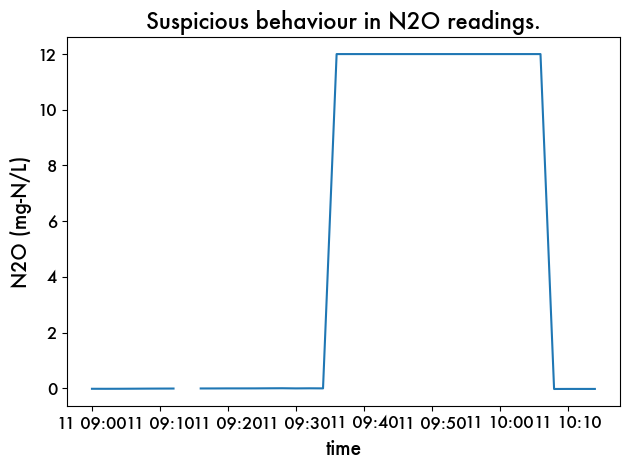

In [1004]:
plt.plot(df.iloc[202490 - 20:202490 + 20]['time'], df[202490 - 20:202490 + 20]['N2O'])
plt.ylabel('N2O (mg-N/L)')
plt.xlabel('time')
plt.title('Suspicious behaviour in N2O readings.')
plt.tight_layout()

This is corrupted data behavior, perhaps a sensor issue. I will replace these values with NaN, and let interpolation fill them in with reasonable values in a later step.

In [1007]:
df.loc[df['N2O'] > 5,'N2O'] = np.nan

In [1009]:
df[['N2O', 'NH4', 'NO3', 'DO']].describe()

,N2O,NH4,NO3,DO
count,520518.000000,520595.000000,520583.000000,520601.000000
mean,0.103187,2.307532,2.777697,0.615051
std,0.224490,2.209858,2.776430,0.612024
min,-0.023727,-0.004505,-0.338735,-0.035807
25%,-0.008681,0.947455,1.179841,0.152995
50%,0.012731,1.866794,2.176571,0.326968
75%,0.109954,3.030480,3.728446,0.989945
max,2.170139,20.007799,52.658241,10.850695


Values less than 0 are unphysical. These must also be sensor issues. Negative values appear in the N2O, NH4, NO3, and DO columns. These are explicitly set to 0 in the next cell.

In [1012]:
df.loc[df['N2O'] < 0,'N2O'] = 0
df.loc[df['NH4'] < 0,'NH4'] = 0
df.loc[df['NO3'] < 0,'NO3'] = 0
df.loc[df['DO'] < 0,'DO'] = 0

In [1014]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906815 entries, 0 to 906814
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time               906815 non-null  datetime64[ns]
 1   N2O                520518 non-null  float64       
 2   NH4                520595 non-null  float64       
 3   NO3                520583 non-null  float64       
 4   DO                 520601 non-null  float64       
 5   airflow            470203 non-null  float64       
 6   SS                 520589 non-null  float64       
 7   temperature        506607 non-null  float64       
 8   PO4                520593 non-null  float64       
 9   wastewater_inflow  454082 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 69.2 MB


There are lots of missing values in the dataset, almost half the data is missing! The next cell investigates how these missing values are distributed throughout the dataset. 

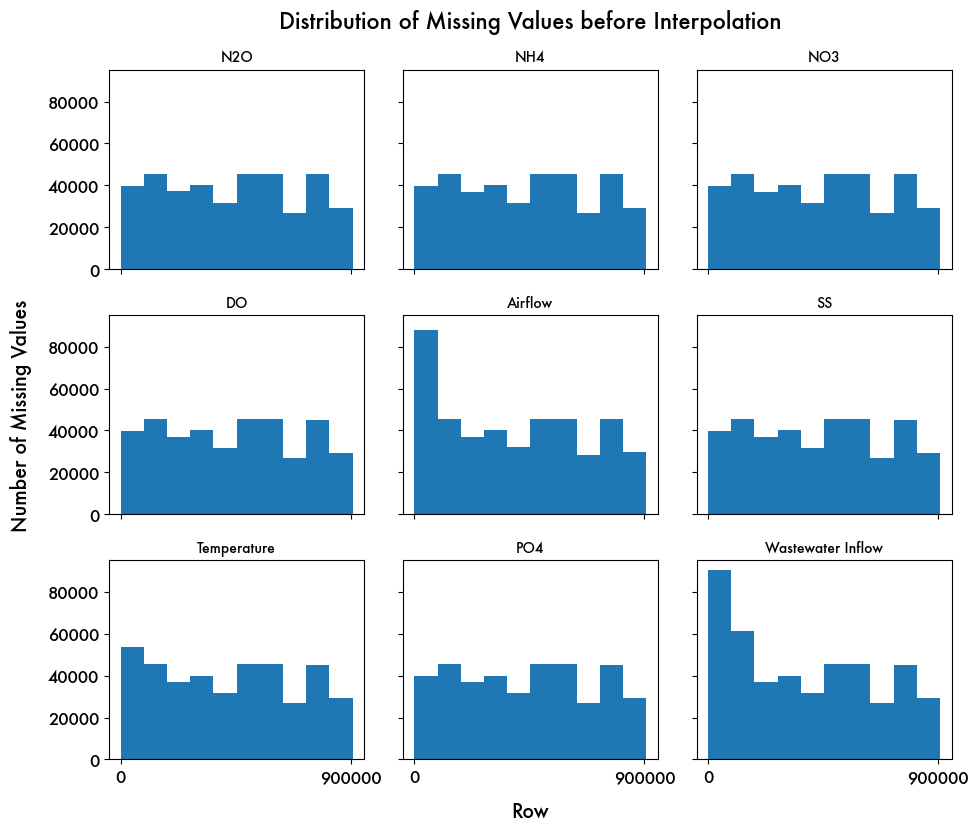

In [1019]:
fig, ax = plt.subplots(3, 3, figsize=(10,8), sharex = True, sharey = True)

ax[0, 0].hist(df[df['N2O'].isna()]['N2O'].index.to_numpy())
ax[0, 1].hist(df[df['NH4'].isna()]['NH4'].index.to_numpy())
ax[0, 2].hist(df[df['NO3'].isna()]['NO3'].index.to_numpy())
ax[1, 0].hist(df[df['DO'].isna()]['DO'].index.to_numpy())
ax[1, 1].hist(df[df['airflow'].isna()]['airflow'].index.to_numpy())
ax[1, 2].hist(df[df['SS'].isna()]['SS'].index.to_numpy())
ax[2, 0].hist(df[df['temperature'].isna()]['temperature'].index.to_numpy())
ax[2, 1].hist(df[df['PO4'].isna()]['PO4'].index.to_numpy())
ax[2, 2].hist(df[df['wastewater_inflow'].isna()]['wastewater_inflow'].index.to_numpy())

ax[0, 0].set_title('N2O', fontsize = 10)
ax[0, 1].set_title('NH4', fontsize = 10)
ax[0, 2].set_title('NO3', fontsize = 10)
ax[1, 0].set_title('DO', fontsize = 10)
ax[1, 1].set_title('Airflow', fontsize = 10)
ax[1, 2].set_title('SS', fontsize = 10)
ax[2, 0].set_title('Temperature', fontsize = 10)
ax[2, 1].set_title('PO4', fontsize = 10)
ax[2, 2].set_title('Wastewater Inflow', fontsize = 10)

ax[0, 0].set_xticks((0, 900000))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.xlabel("Row", labelpad = 10)
plt.ylabel("Number of Missing Values", labelpad = 30)
plt.title("Distribution of Missing Values before Interpolation", pad = 30)

fig_file_name = 'missing_vals_dist_before.png'

plt.savefig(fig_file_path + fig_file_name)

The missing values seem to be uniformly distributed throughout the dataset. Because these measurements are the result of smoothly varyign continuous processes, it is reasonable to linearly interpolate missing values. I do this in the next cell, linearly interpolating upto 10 conescutive missing values.

In [1021]:
df = df.interpolate(method = 'linear', limit = 10)

In [1023]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906815 entries, 0 to 906814
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time               906815 non-null  datetime64[ns]
 1   N2O                901550 non-null  float64       
 2   NH4                901554 non-null  float64       
 3   NO3                901553 non-null  float64       
 4   DO                 901554 non-null  float64       
 5   airflow            815502 non-null  float64       
 6   SS                 901560 non-null  float64       
 7   temperature        877013 non-null  float64       
 8   PO4                901561 non-null  float64       
 9   wastewater_inflow  779494 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 69.2 MB


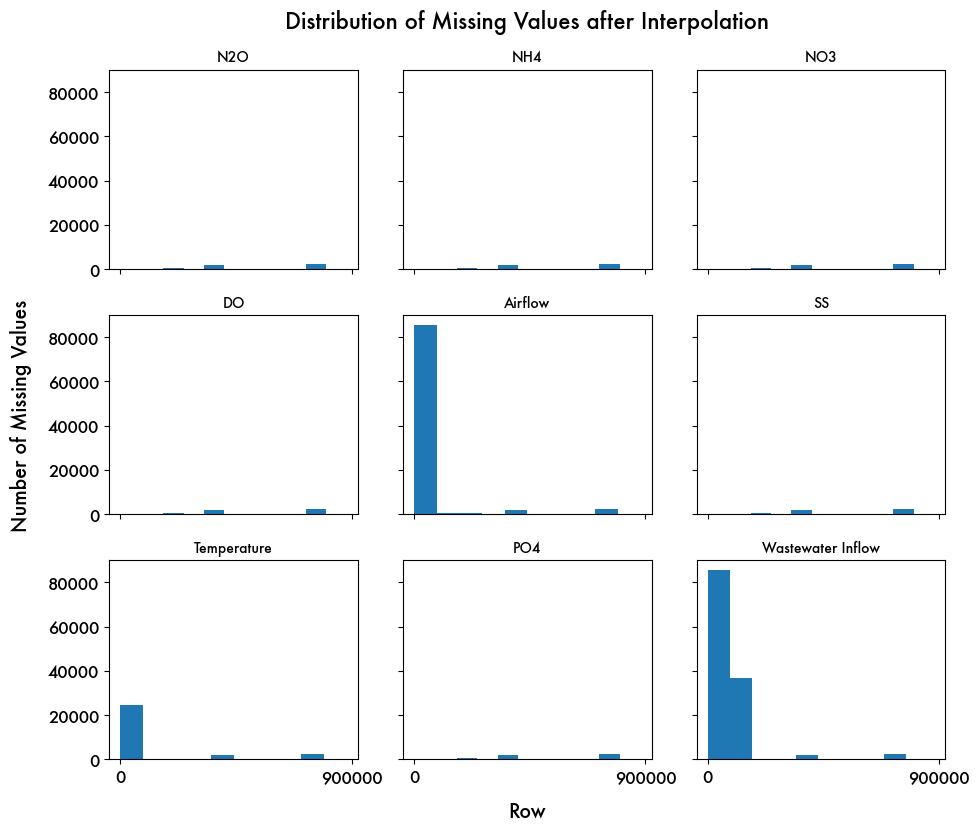

In [1025]:
fig, ax = plt.subplots(3, 3, figsize=(10,8), sharex = True, sharey = True)

ax[0, 0].hist(df[df['N2O'].isna()]['N2O'].index.to_numpy())
ax[0, 1].hist(df[df['NH4'].isna()]['NH4'].index.to_numpy())
ax[0, 2].hist(df[df['NO3'].isna()]['NO3'].index.to_numpy())
ax[1, 0].hist(df[df['DO'].isna()]['DO'].index.to_numpy())
ax[1, 1].hist(df[df['airflow'].isna()]['airflow'].index.to_numpy())
ax[1, 2].hist(df[df['SS'].isna()]['SS'].index.to_numpy())
ax[2, 0].hist(df[df['temperature'].isna()]['temperature'].index.to_numpy())
ax[2, 1].hist(df[df['PO4'].isna()]['PO4'].index.to_numpy())
ax[2, 2].hist(df[df['wastewater_inflow'].isna()]['wastewater_inflow'].index.to_numpy())

ax[0, 0].set_title('N2O', fontsize = 10)
ax[0, 1].set_title('NH4', fontsize = 10)
ax[0, 2].set_title('NO3', fontsize = 10)
ax[1, 0].set_title('DO', fontsize = 10)
ax[1, 1].set_title('Airflow', fontsize = 10)
ax[1, 2].set_title('SS', fontsize = 10)
ax[2, 0].set_title('Temperature', fontsize = 10)
ax[2, 1].set_title('PO4', fontsize = 10)
ax[2, 2].set_title('Wastewater Inflow', fontsize = 10)

ax[0, 0].set_xticks((0, 900000))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.xlabel("Row", labelpad = 10)
plt.ylabel("Number of Missing Values", labelpad = 30)
plt.title("Distribution of Missing Values after Interpolation", pad = 30)

fig_file_name = 'missing_vals_dist_after.png'

plt.savefig(fig_file_path + fig_file_name)

Linear interpolation filled in most of the missing values. The histogram shows some remaining missing values in identical locations for all almost all the measureables. This could indicate a plant shutdown due to maintenance, and these datapoints will be taken care of as specific training datasets are prepared. There is also a significant amount of missing data towards the beginning for airflow, temperature, and wastewater inflow.

In [1028]:
# Saving processed dataset

df.to_csv(processed_data_file_path + processed_data_file_name, index=False)